In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
df=pd.read_csv('/content/drive/MyDrive/datasets/weight-height.csv')
df

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [10]:
df.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


<ipython-input-11-05ee4c8848be>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Weight'])


<Axes: xlabel='Weight', ylabel='Density'>

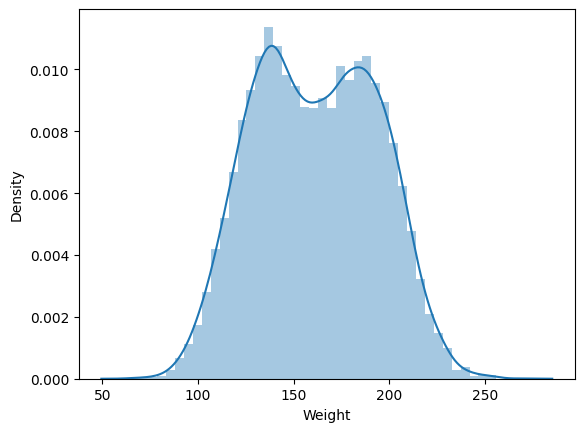

In [11]:
sns.distplot(df['Weight'])

<Axes: ylabel='Weight'>

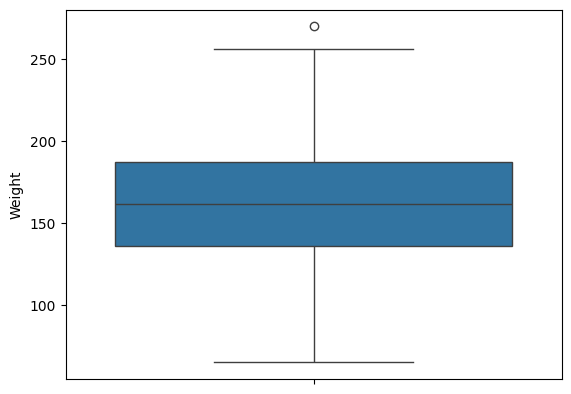

In [12]:
sns.boxplot(df['Weight'])

<ipython-input-13-26dbcd94f059>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Height'])


<Axes: xlabel='Height', ylabel='Density'>

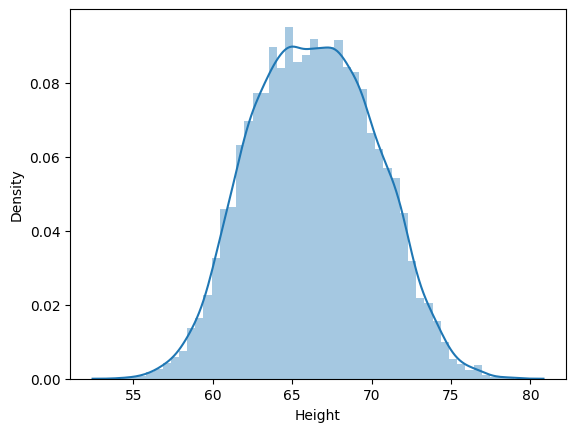

In [13]:
sns.distplot(df['Height'])

<Axes: ylabel='Height'>

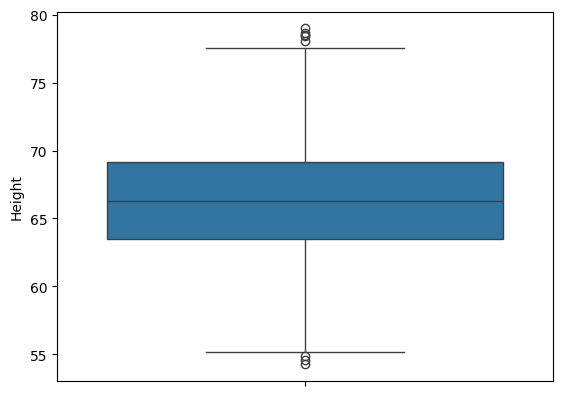

In [14]:
sns.boxplot(df['Height'])

In [15]:
df.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


In [16]:
#finding the boundaries
print("Highest"),df['Height'].mean()+3*df['Height'].std()


Highest


(None, 77.91014411714093)

In [17]:

print("Lowest"),df['Height'].mean()-3*df["Height"].std()

Lowest


(None, 54.82497539250156)

In [18]:
#finding Outliers
df[(df['Height'] > 77.9) | (df['Height'] < 54.82)]


,Gender,Height,Weight
994,Male,78.095867,255.690835
1317,Male,78.462053,227.342565
2014,Male,78.998742,269.989699
3285,Male,78.528210,253.889004
3757,Male,78.621374,245.733783
6624,Female,54.616858,71.393749
9285,Female,54.263133,64.700127


In [19]:
# TRIMMING

In [20]:
new_df=df[ (df['Height'] < 77.9) | (df['Height'] > 54.8) ]
new_df

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [21]:
# Z-SCORE Method

In [22]:
#Calculating Z-Score
df["Height_zscore"]=(df['Height']-df['Height'].mean())/df['Height'].std()
df.head()


,Gender,Height,Weight,Height_zscore
0,Male,73.847017,241.893563,1.943964
1,Male,68.781904,162.310473,0.627505
2,Male,74.110105,212.740856,2.012343
3,Male,71.730978,220.042470,1.393991
4,Male,69.881796,206.349801,0.913375


In [23]:
df[df["Height_zscore"]>3]

,Gender,Height,Weight,Height_zscore
994,Male,78.095867,255.690835,3.048271
1317,Male,78.462053,227.342565,3.143445
2014,Male,78.998742,269.989699,3.282934
3285,Male,78.528210,253.889004,3.160640
3757,Male,78.621374,245.733783,3.184854


In [24]:
df[df["Height_zscore"]< -3]

,Gender,Height,Weight,Height_zscore
6624,Female,54.616858,71.393749,-3.054091
9285,Female,54.263133,64.700127,-3.146027


In [25]:
df[(df["Height_zscore"]>3) | (df["Height_zscore"]< -3)]

,Gender,Height,Weight,Height_zscore
994,Male,78.095867,255.690835,3.048271
1317,Male,78.462053,227.342565,3.143445
2014,Male,78.998742,269.989699,3.282934
3285,Male,78.528210,253.889004,3.160640
3757,Male,78.621374,245.733783,3.184854
6624,Female,54.616858,71.393749,-3.054091
9285,Female,54.263133,64.700127,-3.146027


In [26]:
new_df=df[(df["Height_zscore"]<3) & (df["Height_zscore"]> -3)]
new_df

,Gender,Height,Weight,Height_zscore
0,Male,73.847017,241.893563,1.943964
1,Male,68.781904,162.310473,0.627505
2,Male,74.110105,212.740856,2.012343
3,Male,71.730978,220.042470,1.393991
4,Male,69.881796,206.349801,0.913375
...,...,...,...,...
9995,Female,66.172652,136.777454,-0.050658
9996,Female,67.067155,170.867906,0.181830
9997,Female,63.867992,128.475319,-0.649655
9998,Female,69.034243,163.852461,0.693090


In [27]:
#CAPPING

In [28]:
upper_limit=df['Height'].mean() + 3*df['Height'].std()
lower_limit=df['Height'].mean() - 3*df['Height'].std()

In [29]:
upper_limit


77.91014411714093

In [30]:
lower_limit

54.82497539250156

In [31]:
df['Height']=np.where(
    df['Height']>upper_limit,
    upper_limit,
    np.where(
        df['Height']<lower_limit,
        lower_limit,
        df['Height']
    )
)

In [32]:
df.shape

(10000, 4)

In [33]:
df['Height'].describe()

count    10000.000000
mean        66.367321
std          3.846314
min         54.824975
25%         63.505620
50%         66.318070
75%         69.174262
max         77.910144
Name: Height, dtype: float64